#IMPORT THE DATASET AND STORE IN KAGGLE
This section sets up your environment by importing necessary libraries and configuring the Kaggle API. It then downloads the heart disease dataset directly from the Kaggle platform into the working

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasvanth10","key":"a9f7fb3463a513efc2b887385abdc620"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 45.8MB/s]


*Data Exploration (df.head() and df.isnull().sum())*

Here, the raw data is loaded into a pandas DataFrame. The initial rows are displayed to understand the data's structure and contents. A critical step of checking for null or missing values across all columns is performed to identify any data quality issues that need to be addressed.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


*Data Preprocessing (Handling Missing Values)*

This part focuses on data cleaning. Numerical columns with missing values are filled with the mean of their respective columns to maintain data integrity. Categorical features are prepared for model training using one-hot encoding, which converts them into a numerical format that the algorithms can process.

In [ ]:
number_col = df.select_dtypes(include='number').columns
df[number_col]= df[number_col].fillna(df[number_col].mean())

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


#VISUALIZATION with (seaborn and matplotlib)
This section is dedicated to data visualization. Histograms are generated for all numerical features to inspect their distributions. A correlation heatmap is also created to visualize the relationships between these features, helping to identify potential collinearity and important predictors.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'num'}>,
        <Axes: >]], dtype=object)

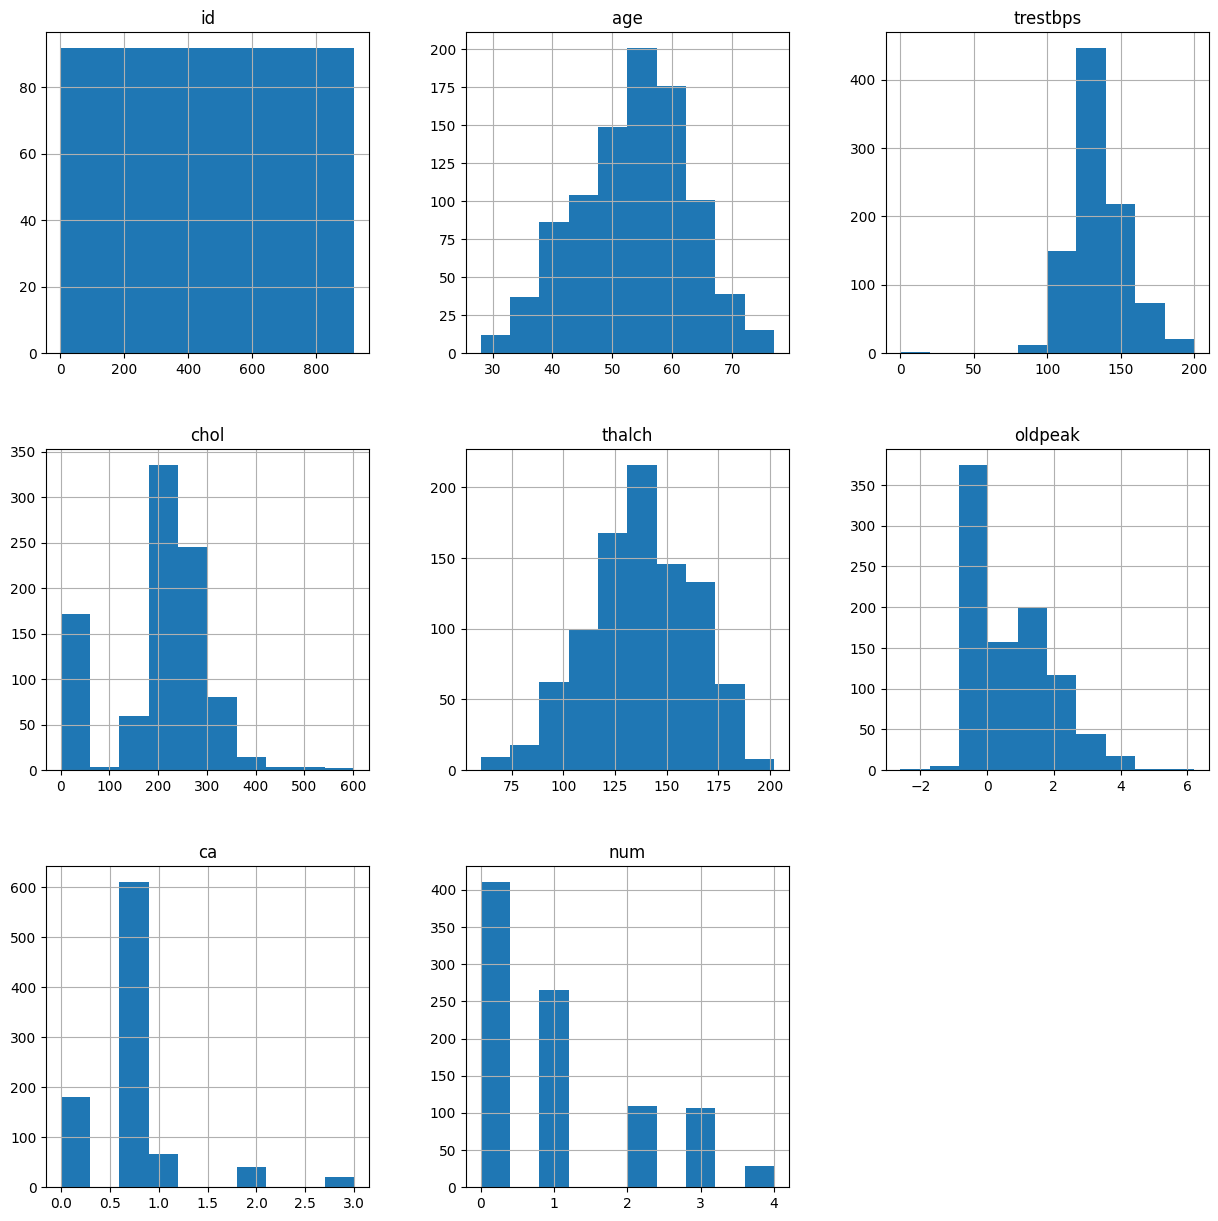

In [ ]:
df[number_col].hist(figsize=(15,15))

Text(0.5, 1.0, 'Numeric Correlation Matrix')

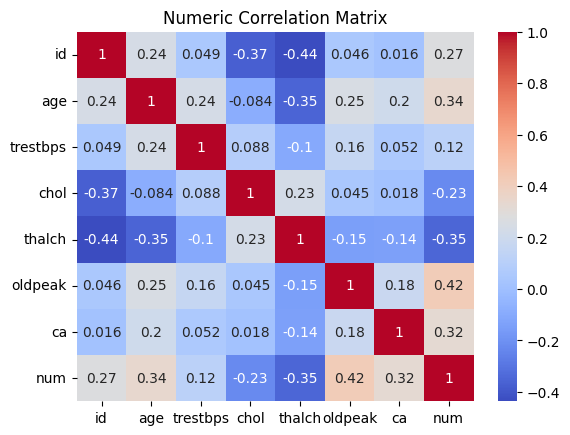

In [ ]:
sns.heatmap(df[number_col].corr(),annot=True, cmap='coolwarm')
plt.title('Numeric Correlation Matrix')

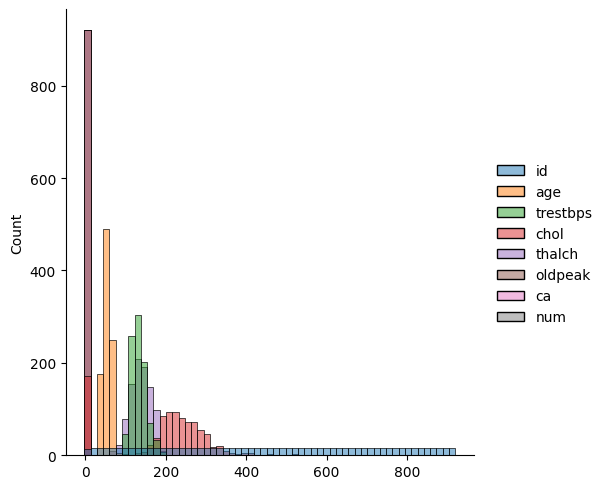

In [ ]:
sns.displot(df[number_col])

In [ ]:
category_col = df.select_dtypes(include='object').columns.to_list()
if 'num' in category_col:
  category_col.remove('num')

In [ ]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int)
x=pd.get_dummies(x, columns=category_col)
print("Final Feauters :", x.columns)

Final Feauters : Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


#MODEL TRAINING WITH TRAIN_TEST METHOD
This is where the core machine learning process begins. The dataset is split into two parts: a training set to teach the model and a test set to evaluate its performance on unseen data. The StandardScaler is used to scale the features, ensuring they are on a similar magnitude for optimal model performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

*LOGISTIC REGRESSION*

A Logistic Regression model is trained and evaluated in this part. The output includes the model's accuracy, a detailed classification report with metrics like precision and recall, and a confusion matrix to show the number of correct and incorrect predictions.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_model_pred = lr_model.predict(x_test_scaled)
print("Accuracy Score : ",accuracy_score(y_test, y_model_pred))
print("Classification Report : \n",classification_report(y_test, y_model_pred))

Accuracy Score :  0.842391304347826
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



<Axes: >

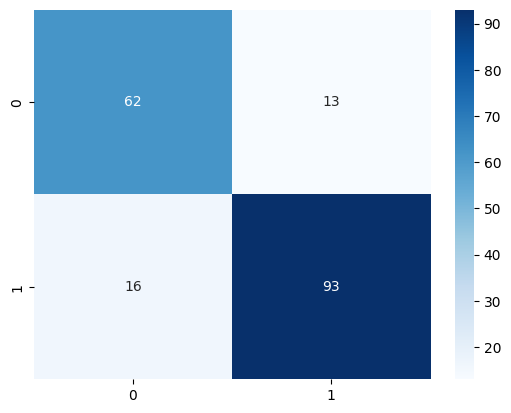

In [ ]:
cm= confusion_matrix(y_test, y_model_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

*RANDOM FOREST CLASSIFIER*

Here, a more advanced machine learning model, the Random Forest Classifier, is trained. This model is generally more robust and accurate. Its performance is also evaluated using the same set of metrics to compare against the Logistic Regression model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled,y_train)
rf_model_pred = rf_model.predict(x_test_scaled)


In [ ]:
print("Accuracy Score : ",accuracy_score(y_test, rf_model_pred))
print("Classification Report : \n",classification_report(y_test, rf_model_pred))

Accuracy Score :  0.8858695652173914
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        75
           1       0.92      0.89      0.90       109

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



#IMPORTANT FEATURES
This section extracts and visualizes the feature importances from the trained Random Forest model. The resulting bar plot clearly shows which features were most influential in the model's decision-making process, providing valuable insights into the key factors for heart disease prediction.

<Axes: >

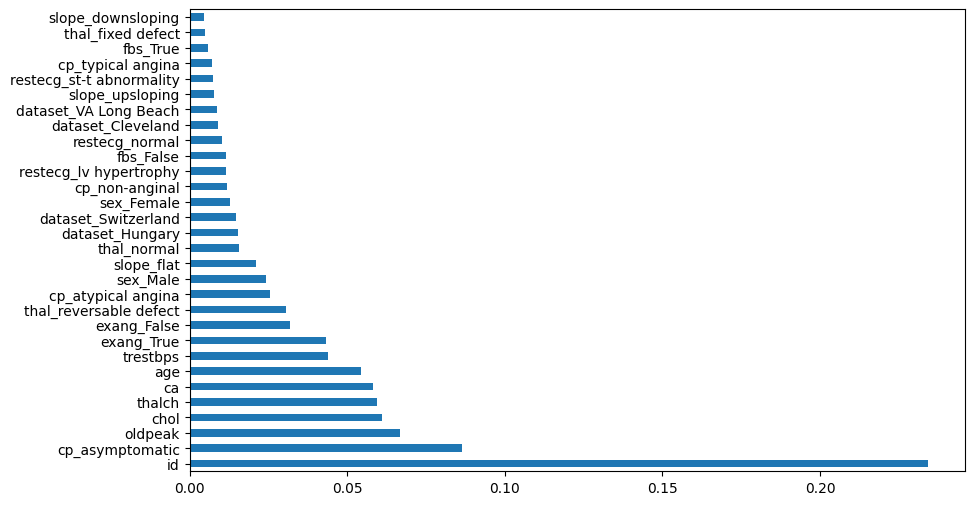

In [ ]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp.plot(kind="barh")

#SAVE THE PREPARED MODEL
This step is crucial for reproducibility and future use. The trained Random Forest model (heart-rf.pkl) and the StandardScaler (heart-scaler.pkl) are saved to disk using joblib. This allows the models to be loaded and used later without having to retrain them.

In [ ]:
import joblib

joblib.dump(rf_model,"heart-rf.pkl")
joblib.dump(scaler,"heart-scaler.pkl")

['heart-scaler.pkl']

#USING NEW DATA FROM USER
This final section demonstrates how the saved model can be used for new predictions. It provides a sample data structure that a user can follow to create their own CSV file. The notebook then processes this new data using the saved scaler and model to generate a prediction, showcasing the practical application of the project.

*IMPORT NEW DATA*

In [ ]:
sample = x.head(1)
print(sample)
sample.to_csv("heart_user_template.csv", index = False)

   id  age  trestbps   chol  thalch  oldpeak   ca  sex_Female  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3  0.0       False      True   

   dataset_Cleveland  ...  restecg_normal  restecg_st-t abnormality  \
0               True  ...           False                     False   

   exang_False  exang_True  slope_downsloping  slope_flat  slope_upsloping  \
0         True       False               True       False            False   

   thal_fixed defect  thal_normal  thal_reversable defect  
0               True        False                   False  

[1 rows x 30 columns]


In [ ]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\r\n58,130,220,1,normal,150,FALSE,1.4,flat,0,fixed defect,0,1,0,0,0,1\r\n67,160,276,0,lv hypertrophy,108,TRUE,1.5,flat,3,normal,0,1,1,0,0,0\r\n42,120,230,0,normal,170,FALSE,1,upsloping,0,reversable defect,1,0,0,0,1,0\r\n50,130,210,0,lv hypertrophy,158,FALSE,0.8,flat,0,normal,0,1,0,0,1,0\r\n45,114,230,0,normal,165,FALSE,1.1,downsloping,0,normal,1,0,0,1,0,0'}

In [ ]:
user_df = pd.read_csv('heart_dataset.csv')

In [ ]:
numeric_col = user_df.select_dtypes(include='number').columns.tolist()
category_col = user_df.select_dtypes(include='object').columns.tolist()
bool_col = user_df.select_dtypes(include='bool').columns.tolist()

*RECOVER THE SAME COLUMNS IN TRAINED*

In [ ]:
numeric_col = [col for col in numeric_col if col not in user_df.columns]
category_col  = [col for col in category_col if col not in user_df.columns]
bool_col = [col for col in bool_col if col not in user_df.columns]

In [ ]:
user_df[numeric_col]= user_df[numeric_col].fillna(user_df[numeric_col].mean())

for col in category_col:
  user_df[category_col] = user_df[category_col].fillna('Unknown')

for col in bool_col:
  user_df[bool_col] = user_df[bool_col].astype(int)


*INSIGHTS OF USER DATA*

In [ ]:
encoded_df = pd.get_dummies(user_df, columns=category_col)
encoded_df.head()

,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1
1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0
2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0
3,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0
4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0


In [ ]:
encoded_df = encoded_df.reindex(fill_value=0)
encoded_df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0,58,130,220,150,1.4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,67,160,276,108,1.5,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,42,120,230,170,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,50,130,210,158,0.8,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,45,114,230,165,1.1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


from matplotlib import pyplot as plt
_df_28['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['thalch'].plot(kind='hist', bins=20, title='thalch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='age', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='chol', y='thalch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='thalch', y='oldpeak', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['trestbps']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('trestbps')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['chol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('chol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['thalch']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('thalch')

from matplotlib import pyplot as plt
_df_40['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_43['thalch'].plot(kind='line', figsize=(8, 4), title='thalch')
plt.gca().spines[['top', 'right']].set_visible(False)

*IMPORT MODEL AND PREDICTION*

In [ ]:
scaler = joblib.load("heart-scaler.pkl")
encoded_df_scaled = scaler.transform(encoded_df)


model= joblib.load("heart-rf.pkl")
user_df['Heart Disease'] = model.predict(encoded_df_scaled)

In [ ]:
print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  Heart Disease  
0                 

*PREDICTION OF USER DATA*


In [ ]:
print(user_df['Heart Disease'].astype(bool))

0    False
1     True
2    False
3    False
4    False
Name: Heart Disease, dtype: bool
